# **Recommendation System - Amazon Book Review Analysis**

# Business Understanding
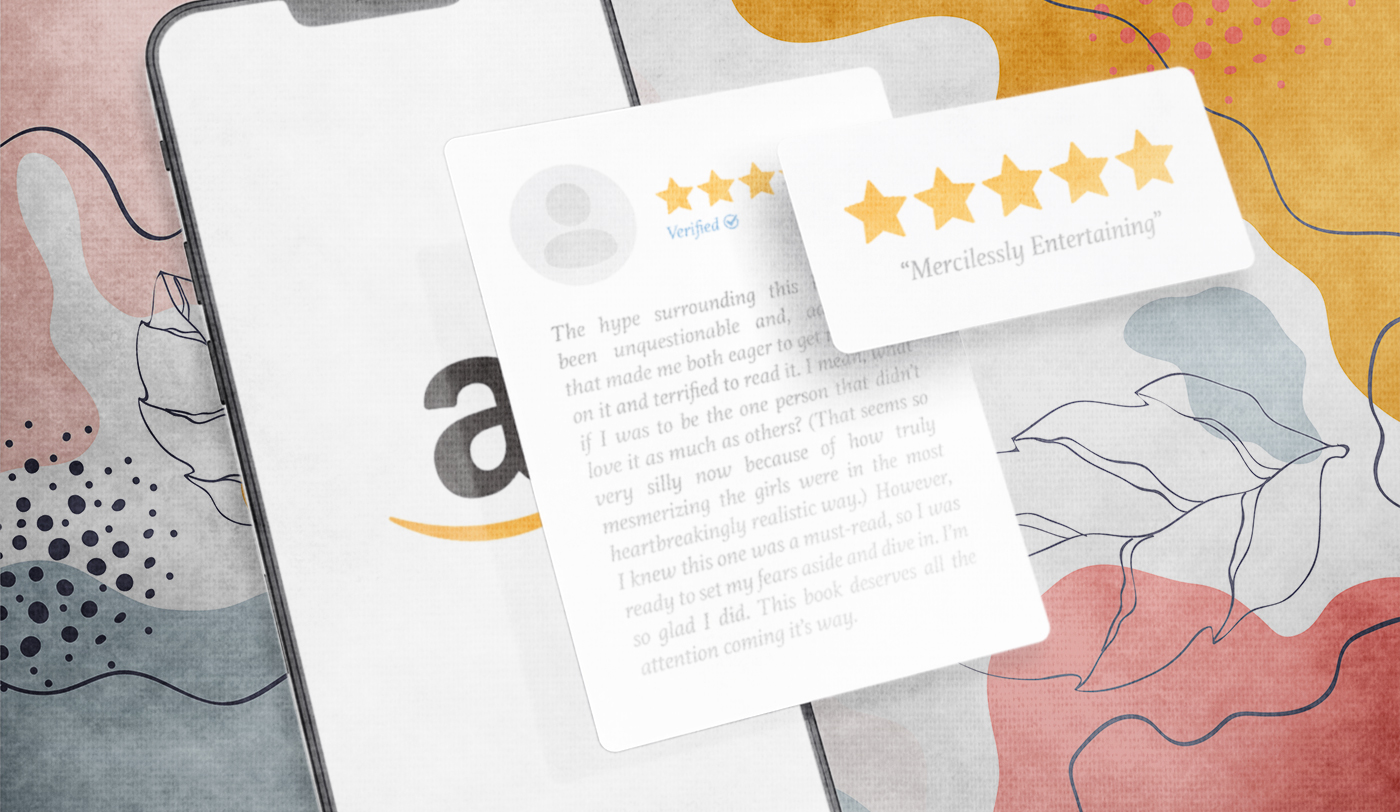
* The days of customers walking into a shop to buy what they need/want are long
behind us and worse still if these are items are not basic needs.
More and more clients prefer to make purchases from the comfort of their home.
* The goods that a retailer is able to market online is limitless however customers easily get tired of scrolling though an endless catalogue of items for sale.
* Therefore rises the need for a recommendation system that will enable a client have a seamless buying experience.
The reading culture is changing hence our choice of the amazon books dataset.
* A recommendation system will enable buyers get the most ideal and trending books to buy.
* The target audience would be both the retailers and the purchasers.





# Data Understanding & Source
* The data has been obtained from https://amazon-reviews-2023.github.io/ and in jsonl format. An efficient format for storing data that is unstructured or produced over time.
* It contains a list of books sold in Amazon. The original dataset contains 4 million rows, from 1996 to 2023. We trimmed it to 300k rows from the year 2023 to make it easier to work with.
* Vital information was missing from the dataset (price, book title). This was
  obtained by merging the data with the metadata dataset.
* The data contains following features/columns in the dataset.

| Column Name | Description |
|---|---|
| rating | Rating of the product (from 1.0 to 5.0). |
| title_x | Title of the user review. |
| text | Text body of the user review. |
| images | Links to images (comma-separated if multiple). |
| asin(product key) | Unique identifier for the product. |
| parent_asin | Identifier for the parent product (applicable for variations). |
| user_id | Unique identifier for the reviewer. |
| timestamp | Date and time of the review. |
| helpful_vote | Number of helpful votes received by the review. |
| verified_purchase | Indicates whether the reviewer purchased the product (True/False). |
| main_Category | Main category (domain) to which the product belongs (e.g., Electronics, Clothing). |
| title_y | Name of the product as mentioned in the review. |
| price | Price of the product in US dollars. |



## Data Importation

In [ ]:
# Mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import the necesarry libraries

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the merged dataset
file_path = '/content/drive/MyDrive/merged_Books.jsonl'
# Initialize an empty list to store the parsed JSON objects
data = []

# Read each line of the JSON Lines file and parse it
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert the list of JSON objects into a DataFrame
df = pd.DataFrame(data)
df.head()

,rating,title_x,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,price
0,5,Wonderful and Inspiring,This book is wonderful and inspiring for kids ...,[],B0C6Z8N9N8,B0C6Z8N9N8,AG2FEEHWHCQELOHBIDQDROZ3LSNA,1694657549017,0,False,Books,Of Life: The Rollercoaster,from 11.99
1,5,Awesome book,This is a wonderful children’s book! My daught...,[],B0C6Z8N9N8,B0C6Z8N9N8,AERUMG7KTKZAIOQ3PO5LJUF33UKQ,1693063638325,0,False,Books,Of Life: The Rollercoaster,from 11.99
2,5,Amazing,Product arrived quickly in great condition. Be...,[],1401241883,1401241883,AEK3AFSE3D2BSOC6XI65XNO23MKQ,1694654386695,0,True,Books,The Sandman Omnibus Vol. 1,80.23
3,5,Got this at a great price.,I payed $89.00 dollars. When it first came out...,[],1401241883,1401241883,AFPYBFVIJI3GFPPFANRYIBJZKPLA,1683048302761,0,True,Books,The Sandman Omnibus Vol. 1,80.23
4,5,The Best of the Best,Neil Gaimans stories are spellbinding. Moreove...,[],1401241883,1401241883,AECBBBUARXJEZYZS2PXN2K66A4DA,1679249708115,0,False,Books,The Sandman Omnibus Vol. 1,80.23


### Data Understanding

In [ ]:
# Preview the attributes of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             300000 non-null  int64 
 1   title_x            300000 non-null  object
 2   text               300000 non-null  object
 3   images             300000 non-null  object
 4   asin               300000 non-null  object
 5   parent_asin        300000 non-null  object
 6   user_id            300000 non-null  object
 7   timestamp          300000 non-null  int64 
 8   helpful_vote       300000 non-null  int64 
 9   verified_purchase  300000 non-null  bool  
 10  main_category      299989 non-null  object
 11  title_y            300000 non-null  object
 12  price              267594 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 27.8+ MB


In [ ]:
# Review the rows and columns of the data
df.shape

(300000, 13)

In [ ]:
# Min and max rating
print('Max rating:', df['rating'].max())
print('Min rating:',df['rating'].min())

Max rating: 5
Min rating: 1


- Some book titles appear multiple times. We can get the value counts for the most frequent.

In [ ]:
# Most frequent boooks
df['title_y'].value_counts()

title_y
The Sacrifice: A Dark Revenge Romance                                                            476
Spare                                                                                            463
The Maid's Diary: A Novel                                                                        354
The Serpent and the Wings of Night (Crowns of Nyaxia Book 1)                                     296
Stone Maidens                                                                                    260
                                                                                                ... 
The Long Goodbye: A Philip Marlowe Novel, Book 6                                                   1
Corpse in the Mead Hall: A Viking Witch Cozy Mystery (The Viking Witch Cozy Mysteries Book 6)      1
Metro Wine Map of France                                                                           1
Souffle Cookbook: Souffle Recipes from Around the World: Souffle Cookbook For You  

- Getting the value counts for users that give multiple review ('user_id')

In [ ]:
# Top 5 users based on the number of ratings
top_five_users = df.groupby('user_id').size().sort_values(ascending=False)[:5]
top_five_users

user_id
AHK67LFXJBYE5APXUTYTJTDSHL4A      264
AGWMG5ARMSS5U2FMSSMPNML6MTNQ_1    121
AGVBYI2T5QRJVZ6KX2YH7LHF7YRQ       90
AFMBF3NCA6H2AHO6D2WX6SUBPELA       86
AENPLYFNCNXWGB3XF2HPD5EKJD6Q       80
dtype: int64

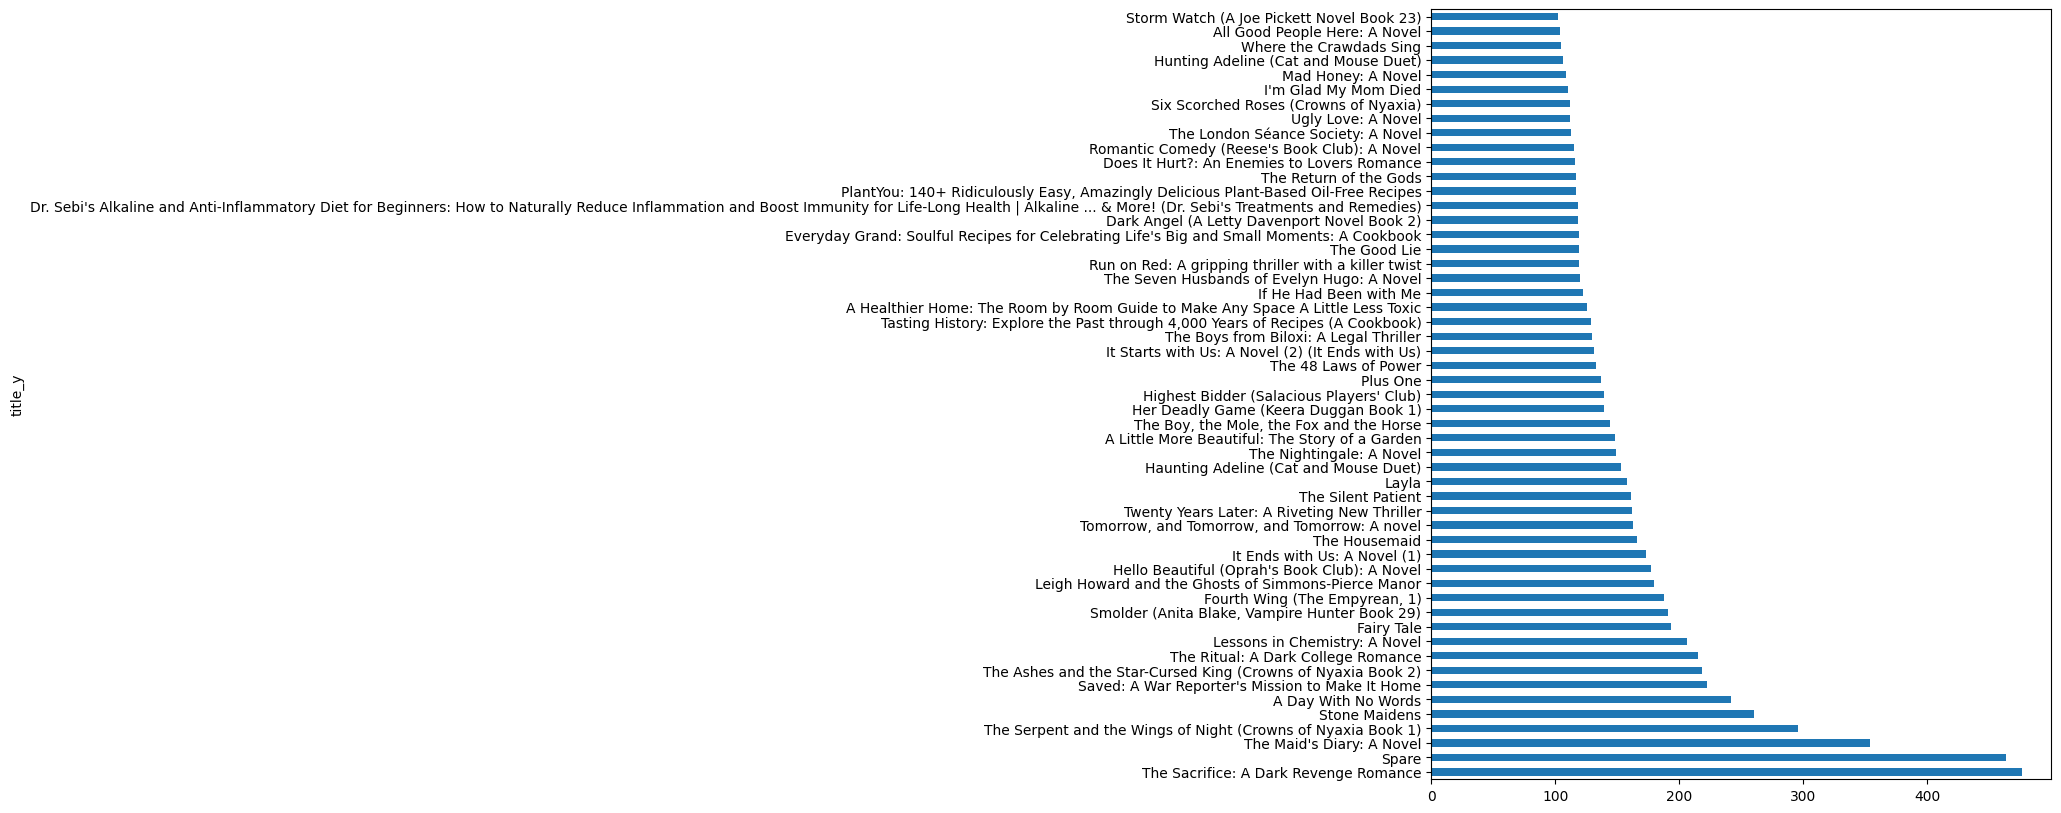

In [ ]:
# Visual for book title appearing more than 200 times
filtered_counts = df['title_y'].value_counts()[lambda x: x >= 100]
# Increase plot width using figsize
plt.figure(figsize=(8, 10))

# Plot the distribution
filtered_counts.plot(kind='barh')
plt.show()

In [ ]:
# Books only appearing once and more than 50 times in the data
single_mention = df['title_y'].value_counts()[lambda x: x == 1]
above_fifty_mention = df['title_y'].value_counts()[lambda x: x >= 50]
print(len(above_fifty_mention))
print(len(single_mention))

180
114626


In [ ]:
# Having a df with unique book titles
df = df.drop_duplicates(subset=['title_y'])
df['title_y'].value_counts()

title_y
Irish Rain                                                                                                                     1
Of Life: The Rollercoaster                                                                                                     1
The Sandman Omnibus Vol. 1                                                                                                     1
The Keeper of Happy Endings                                                                                                    1
The Echo of Old Books: A Novel                                                                                                 1
                                                                                                                              ..
123 Counting Sticker Book (My Little World)                                                                                    1
Soap Making Business Startup: How to Start, Run & Grow a Million Dollar Success From Home

In [ ]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.2 MB/s eta 0:00:00


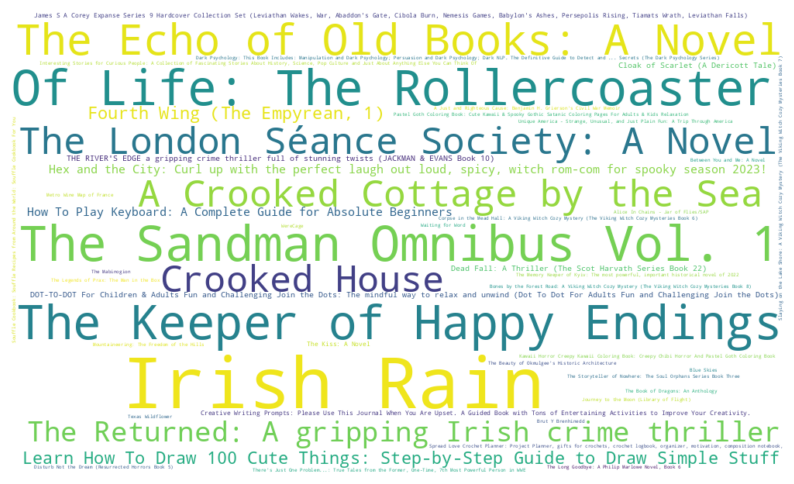

In [ ]:
# Create a wordcloud of the most purchased books
from wordcloud import WordCloud

# Count occurrences of each book title
book_counts = df['title_y'].value_counts()

# Select the top 50 most frequent books
top_50_books = book_counts.head(50)

# Convert to a dictionary where the keys are the book titles and the values are their frequencies
word_freq = top_50_books.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Visualizing distribution of ratings.

        title_y
rating         
1         11341
2          5578
3          7781
4         14911
5        116476


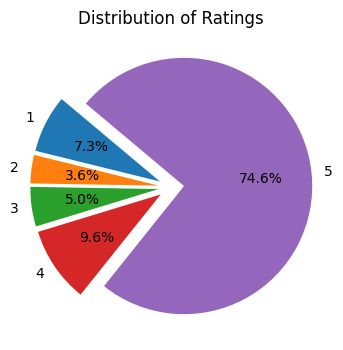

In [ ]:
# Group sales data rating by count of title

rating_df = df[['rating', 'title_y']].copy().groupby('rating').count()
print(rating_df)

# Explode settings
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Explode all the slices

# Plot
plt.figure(figsize=(4, 4))
plt.pie(rating_df['title_y'], labels=rating_df.index, autopct='%1.1f%%', startangle=140, explode = explode)
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

- Books with a rating of 5 take up 74.6% of the data. This necessitates for more features to be used in recommendation, that is title for rating and rating text.

In [ ]:
# Books rating count
rating_count = df['rating'].value_counts()
rating_count

rating
5    116476
4     14911
1     11341
3      7781
2      5578
Name: count, dtype: int64

In [ ]:
# Get user count information
user_count = df['user_id'].value_counts()
single_user_mention = df['user_id'].value_counts()[lambda x: x == 1]
print('Number of users appearing once:',len(single_user_mention) )
print('Number of unique users:',len(user_count))

Number of users appearing once: 105282
Number of unique users: 122457


##### Exploring the 'main_category' field

In [ ]:
# Identify the unique values in the

print(df['main_category'].unique())

['Books' 'Buy a Kindle' 'Musical Instruments' 'Audible Audiobooks' ''
 'Toys & Games' 'Office Products' 'AMAZON FASHION' 'Amazon Home' None
 'Tools & Home Improvement' 'Arts, Crafts & Sewing'
 'Industrial & Scientific']


In [ ]:
# Identify the unique values in the 'main_category'
print(df['main_category'].value_counts())

main_category
Books                       136261
Buy a Kindle                 14781
Audible Audiobooks            4872
                               132
Toys & Games                    15
Musical Instruments              5
Office Products                  5
Amazon Home                      5
AMAZON FASHION                   1
Tools & Home Improvement         1
Arts, Crafts & Sewing            1
Industrial & Scientific          1
Name: count, dtype: int64


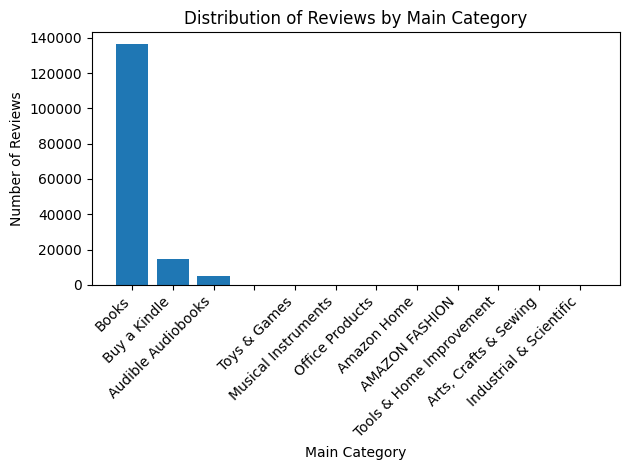

In [ ]:
# Count the occurrences of each category
category_counts = df['main_category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Main Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Main Category')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

- From the plot above we see that most of the books are classified in the **Books**, **Buy a Kindle** and **Audiobooks** category. Other categories do not have more than 30 books, and 182 of them not categorized.
- Category column does not give the book genres accurately and therefor will be dropped

# Data Cleaning

- First we drop the columns not needed
  - images
  - asin
  - parent_asin
  - timestamp
  - verified_purchase

In [ ]:
# Drop the columns
columns_to_drop = ['images','asin', 'parent_asin', 'timestamp', 'verified_purchase']
df1 = df.drop(columns_to_drop, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         156087 non-null  int64 
 1   title_x        156087 non-null  object
 2   text           156087 non-null  object
 3   user_id        156087 non-null  object
 4   helpful_vote   156087 non-null  int64 
 5   main_category  156080 non-null  object
 6   title_y        156087 non-null  object
 7   price          139540 non-null  object
dtypes: int64(2), object(6)
memory usage: 10.7+ MB


In [ ]:
# Remove the words 'from' and 'None' from the price column
df1['price'] = df1['price'].astype(str).str.replace(r'(from|None)\s*','', regex=True)

# Remove special characters from the price column
df1['price'] = df1['price'].replace(['','—'],np.nan)

# Convert the price column to data type float
df1['price'] = df1['price'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         156087 non-null  int64  
 1   title_x        156087 non-null  object 
 2   text           156087 non-null  object 
 3   user_id        156087 non-null  object 
 4   helpful_vote   156087 non-null  int64  
 5   main_category  156080 non-null  object 
 6   title_y        156087 non-null  object 
 7   price          137727 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.7+ MB


In [ ]:
# Sum up the null values in the price column

df1['price'].isnull().sum()

18360

In [ ]:
# Fill null values in 'price' column with the mean

df1['price'] = df1['price'].fillna(df1['price'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         156087 non-null  int64  
 1   title_x        156087 non-null  object 
 2   text           156087 non-null  object 
 3   user_id        156087 non-null  object 
 4   helpful_vote   156087 non-null  int64  
 5   main_category  156080 non-null  object 
 6   title_y        156087 non-null  object 
 7   price          156087 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.7+ MB


- With no missing values, we move to renaming the columns to more meaningful titles

In [ ]:
# Rename the title_x and title_y column to title_rating and title_book respectively

df1 = df1.rename(columns={'title_x': 'title_rating', 'title_y': 'title_book'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         156087 non-null  int64  
 1   title_rating   156087 non-null  object 
 2   text           156087 non-null  object 
 3   user_id        156087 non-null  object 
 4   helpful_vote   156087 non-null  int64  
 5   main_category  156080 non-null  object 
 6   title_book     156087 non-null  object 
 7   price          156087 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.7+ MB


In [ ]:
# Preview the data with new columns
df1.head(3)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price
0,5,Wonderful and Inspiring,This book is wonderful and inspiring for kids ...,AG2FEEHWHCQELOHBIDQDROZ3LSNA,0,Books,Of Life: The Rollercoaster,11.99
2,5,Amazing,Product arrived quickly in great condition. Be...,AEK3AFSE3D2BSOC6XI65XNO23MKQ,0,Books,The Sandman Omnibus Vol. 1,80.23
5,5,Good,Just what I expectef,AFAHBYOMYBR5JNAYCR5P2PCUBMWQ,0,Books,The Keeper of Happy Endings,13.46


In [ ]:
# Convert text and title_rating column to lower case and remove punctuation marks
import string

def clean_text(text):
  if isinstance(text, str):
    text = text.lower()
    # Remove punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
  else:
    return str(text)

df1['text'] = df1['text'].apply(lambda x: clean_text(x))
df1['title_rating'] = df1['title_rating'].apply(lambda x: clean_text(x))

In [ ]:

# Tokenize and remove stop words from the text and title_rating columns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """
  This function removes stop words from a given text string.

  Args:
      text (str): The string to remove stop words from.

  Returns:
      list: A list of words after removing stop words from the original text.
  """
    # Tokenize input text
    tokens = word_tokenize(text)
    # filter out stop wiords and return list of words without stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
# Apply the remove_stopwords function to the 'text' and 'title_rating'
df1['tokenized_text'] = df1['text'].apply(lambda x: remove_stopwords(x))
df1['tokenized_title_rating'] = df1['title_rating'].apply(lambda x: remove_stopwords(x))
df1.sample(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating
172507,5,informative,enjoyed reading it is informative with nice pi...,AHITNFJGUWWYDTF46K6RAAE7I6GQ,1,Books,Gemstones: A Concise Reference Guide,17.49,"[enjoyed, reading, informative, nice, pictures...",[informative]
104228,5,fantastic read,absolutely loved this book fantastic story and...,AF7EZ3WWX2FBB7ATI2S6BKGPGGCA,0,Books,The Younger Wife: A Novel,15.88,"[absolutely, loved, book, fantastic, story, we...","[fantastic, read]"
272084,4,essentially a shorter version of other thinkin...,i got this and other grade 3 curriculum books ...,AERUHOWCRKOJYLZZ2RARPFFA2CXA,0,Books,Carson Dellosa The Complete Book of Third Grad...,12.99,"[got, grade, 3, curriculum, books, compare, pr...","[essentially, shorter, version, thinking, kids]"


In [ ]:
# Display a frequency distribution of the most common words

from nltk.probability import FreqDist
from itertools import chain

def common_words(df, column, n=15):
  all_tokens = list(chain.from_iterable(df1['tokenized_title_rating']))
  fdist = FreqDist(all_tokens)
  return fdist.most_common(n)

common_words(df1, 'tokenized_title_rating', 15)

[('book', 27586),
 ('great', 19943),
 ('read', 10661),
 ('good', 9299),
 ('love', 6119),
 ('story', 5379),
 ('excellent', 3931),
 ('fun', 3845),
 ('’', 3432),
 ('beautiful', 2918),
 ('amazing', 2875),
 ('cute', 2577),
 ('series', 2376),
 ('best', 2371),
 ('perfect', 2297)]

In [ ]:
# Add 'book' and ' to the stop words list and remove them from the tokenized_title_rating in the dataset

additional_stop_words = {'book', '’','story'}

stop_words.update(additional_stop_words)

df1['tokenized_title_rating'] = df1['title_rating'].apply(lambda x: remove_stopwords(x))

print(common_words(df1, 'tokenized_title_rating', 10))


[('great', 19943), ('read', 10661), ('good', 9299), ('love', 6119), ('excellent', 3931), ('fun', 3845), ('beautiful', 2918), ('amazing', 2875), ('cute', 2577), ('series', 2376)]


title_book
Fido's Magical Quest: An Adventure for All Ages                                                                                                                              1
THE RIVER'S EDGE a gripping crime thriller full of stunning twists (JACKMAN & EVANS Book 10)                                                                                 1
Dead Fall: A Thriller (The Scot Harvath Series Book 22)                                                                                                                      1
The Megalodon Mix-Up (A Charlie Rhodes Cozy Mystery Book 4)                                                                                                                  1
123 Counting Sticker Book (My Little World)                                                                                                                                  1
                                                                                                                  

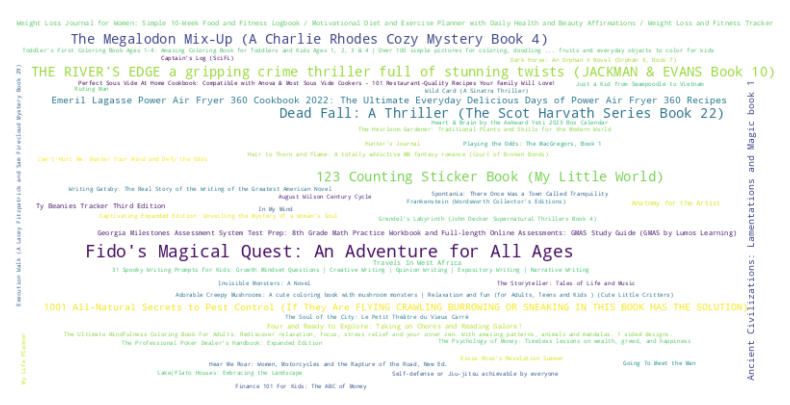

In [ ]:
# Filter the DataFrame to include only rows where the title rating contain the common words
placeholder_word = 'great'

common_words_books_df = df1[df1['tokenized_title_rating'].apply(lambda x: placeholder_word in x)]
common_words_books_count_df = common_words_books_df['title_book'].value_counts()
print(common_words_books_count_df)

# Select the top 50 books with the most common word
top_50_common_words_books_df = common_words_books_count_df.head(50)

# Convert into a dictionary where the keys are the book titles and the values are their frequencies
word_freq_great = top_50_common_words_books_df.to_dict()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_great)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

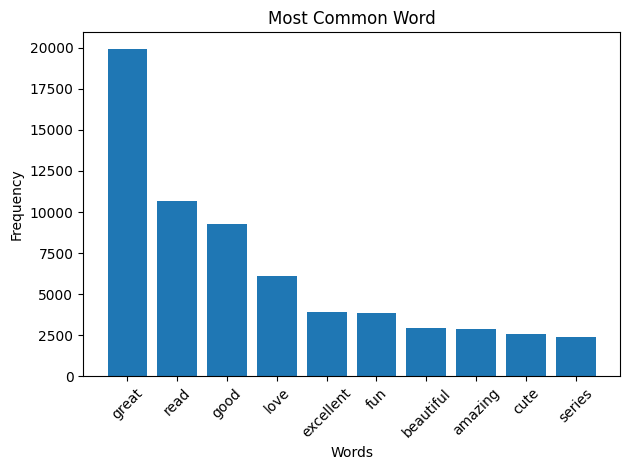

In [ ]:
# Get the 10 most common words (excluding additional stop words)
most_common_words = common_words(df1, 'tokenized_title_rating', 10)

# Unpack tuples into separate lists for words and counts
words, counts = zip(*most_common_words)

# Create a bar chart to visualize the most common words
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modelling

In [ ]:
df1.sample(2)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating
183793,2,overproduced and underedited,good to have these important poems in book for...,AGNAFS6TZDSJGMRATTLZKGBIPTWQ,0,Books,"Live Oak, with Moss",10.98,"[good, important, poems, book, form, actual, b...","[overproduced, underedited]"
285966,5,good read,what a interesting life,AECE5YC3NO3UV67LD4QRNUKSPKMA,0,Books,The Sad and Tragic Ending of Lucille Ball: Vol...,23.99,"[interesting, life]","[good, read]"


Sentiment Analysis:

The goal is to understand the sentiment expressed in the review text (positive or negative).
The sentiment analysis here includes traditional machine learning algorithms involving Multinomial Naive Bayes analysis, Support Vector Machines (SVM) and Random Forest.

### Multinomial Naive Bayes classifier

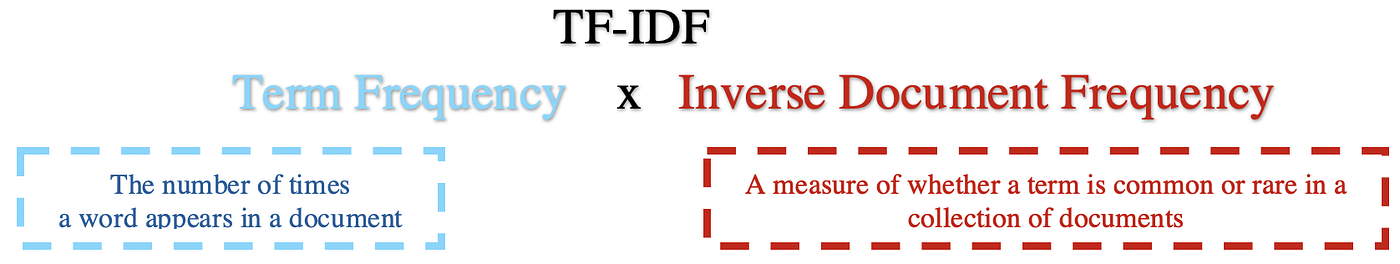

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Select the features
X = df1['tokenized_title_rating']
y = (df1['rating'] > 3).astype(int)  # Convert ratings to binary labels (1 for positive, 0 for negative)

# Convert each review text list to a single string
X_str = [' '.join(tokens) for tokens in X]

# Split data into train and test sets(20%)
X_train, X_test, y_train, y_test = train_test_split(X_str, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.45      0.58      4926
           1       0.90      0.98      0.94     26292

    accuracy                           0.90     31218
   macro avg       0.87      0.72      0.76     31218
weighted avg       0.89      0.90      0.89     31218



In [ ]:
def evaluate_model(feature_count):
    # Vectorization with the specified number of features
    tfidf_vectorizer = TfidfVectorizer(max_features=feature_count)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train the classifier
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = nb_classifier.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

- Create a function to check for best feature count

In [ ]:
print('Accuracy for 1000 features:',evaluate_model(1000))
print('Accuracy for 3000 features:',evaluate_model(3000))
print('Accuracy for 5000 features:',evaluate_model(5000))
print('Accuracy for 10000:',evaluate_model(10000))

Accuracy for 1000 features: 0.8838810942405023
Accuracy for 3000 features: 0.8949003779870588
Accuracy for 5000 features: 0.8981997565507079
Accuracy for 10000: 0.8995451342174386


The difference between 5000 features and  10000 features is 0.001 which we consider as negligible and proceed with using 5000.

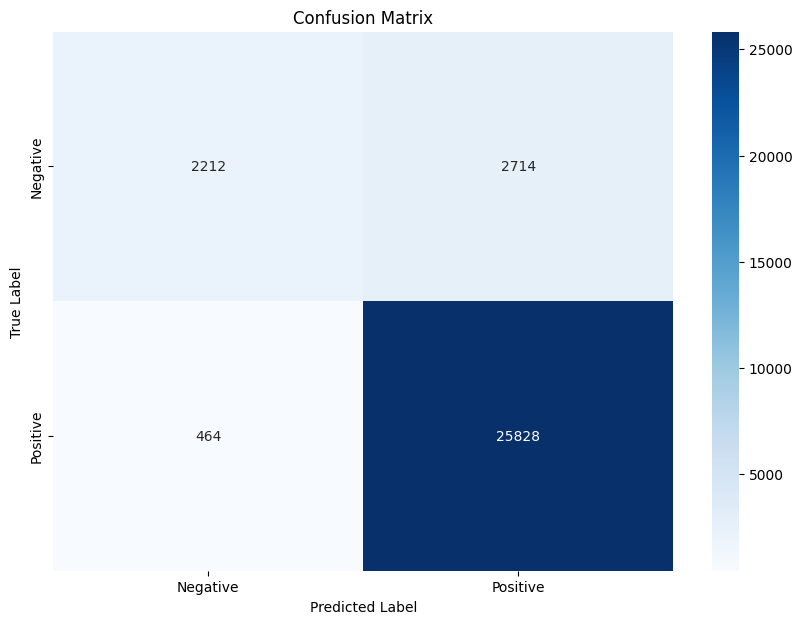

In [ ]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Overall the model performed well with an accuracy of 90%. This translates to 28040 accurate reviews and compared to 3178 negative predictions. This led to selecting a different model; Support Vector Machines that can handle imbalanced data better.

### SVM

In [ ]:
from sklearn.svm import LinearSVC

# Create TF-IDF vectors with 5000 max features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X_str)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train LinearSVC classifier
svm_classifier = LinearSVC(dual=False)
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.50      0.62      4926
           1       0.91      0.98      0.94     26292

    accuracy                           0.90     31218
   macro avg       0.85      0.74      0.78     31218
weighted avg       0.89      0.90      0.89     31218



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=40)

# Fit Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Perform cross-validation and make predictions
y_pred_cv = cross_val_predict(rf_classifier, X_tfidf, y, cv=5)

# Evaluate performance using classification report
report = classification_report(y, y_pred_cv)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.09      0.16     24700
           1       0.85      1.00      0.92    131387

    accuracy                           0.86    156087
   macro avg       0.90      0.54      0.54    156087
weighted avg       0.87      0.86      0.80    156087



- First we asses the model’s ability to generalize. We perform a grid search with cross-validation to find the optimal max_depth value

Best parameters: {'max_depth': 40}
Best cross-validation score: 0.852313151740708


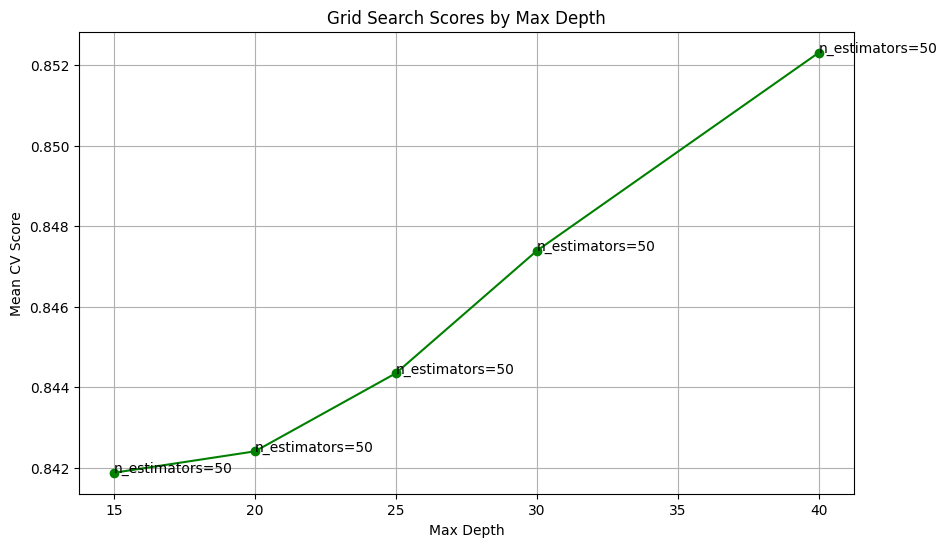

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [15, 20, 25, 30, 40]
}

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_tfidf, y)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Visualize

# Extract the mean test scores for each parameter setting in the grid
mean_scores = grid_search.cv_results_['mean_test_score']

# Number of trees in random forest for each grid search iteration
num_trees = [50] * len(param_grid['max_depth'])

# Max depth values for each grid search iteration
max_depth_values = param_grid['max_depth']

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_scores, marker='o', linestyle='-', color='g')

# Annotating the number of trees for each point
for i, txt in enumerate(num_trees):
    plt.annotate(f'n_estimators={txt}', (max_depth_values[i], mean_scores[i]))

plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score')
plt.title('Grid Search Scores by Max Depth')
plt.grid(True)
plt.show()

- A max_depth of 40 was used. This was a good balance for model accuracy and computational cost.

#### ROC Curve
- Comparing the three classifiers with ROC curve but using One vs Rest (OvR) method. This method compares one class with others by reducing the multiclass classification to multiple binary classification.

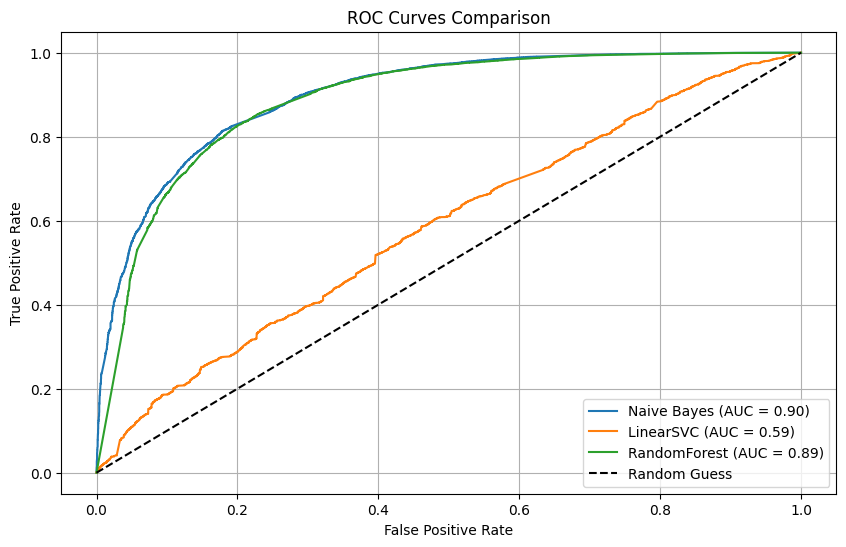

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curves and ROC AUC for Multinomial Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC curves and ROC AUC for each classifier
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

decision_scores_svm = svm_classifier.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, decision_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf_proba = rf_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"LinearSVC (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Naive Bayes: The curve for Naive Bayes has an AUC (Area Under the Curve) of 0.90, which indicates a high level of performance in distinguishing between the positive and negative classes.
- LinearSVC: The LinearSVC curve has an AUC of 0.51, suggesting that it performs only slightly better than random guessing.
- RandomForest: The RandomForest curve has an AUC of 0.89, showing good performance, though not as high as Naive Bayes.

## Recommendation System
- **Build the content-based recommendation system.**
  - We create a TF-IDF matrix from the lemmatized text.
  - Compute cosine similarity between items based on their TF-IDF vectors.
  - Define a function to get recommendations for a given book title.

This approach recommends books based on the lemmatized_title_rating text
  - Calculate TF-IDF vectors for "lemmatized_title_rating". Recommend books with the highest cosine similarity to a user's preferred book.
  - Keyword matching: Extract keywords from "lemmatized_title_rating". Recommend books with similar keywords to a user's preferred book.


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(w) for w in tokens]

# Apply lemmatization to the 'tokenized_text' column
df1['lemmatized_text'] = df1['tokenized_title_rating'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Lemmatize tokenized_title_rating column
df1['lemmatized_title_rating'] = df1['tokenized_title_rating'].apply(lemmatize_text)
df1.sample(2)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating,lemmatized_text,lemmatized_title_rating
54844,5,tough and informative,i knew this would be an exciting book to read ...,AE4NUL4D3AYEGBH4AY5BIKTAKYPQ,0,Buy a Kindle,The Moment of Lift: How Empowering Women Chang...,11.99,"[knew, would, exciting, book, read, amazing, f...","[tough, informative]","[tough, informative]","[tough, informative]"
140660,1,not in the condition i requested,i am retuning this book it was used i wanted a...,AEEMSTTOB2YKEV7JKPT6CRKVBUZQ,2,Books,From Phonics to Reading Student Edition Level ...,22.01,"[retuning, book, used, wanted, brand, new, boo...","[condition, requested]","[condition, requested]","[condition, requested]"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rating                   156087 non-null  int64  
 1   title_rating             156087 non-null  object 
 2   text                     156087 non-null  object 
 3   user_id                  156087 non-null  object 
 4   helpful_vote             156087 non-null  int64  
 5   main_category            156080 non-null  object 
 6   title_book               156087 non-null  object 
 7   price                    156087 non-null  float64
 8   tokenized_text           156087 non-null  object 
 9   tokenized_title_rating   156087 non-null  object 
 10  lemmatized_text          156087 non-null  object 
 11  lemmatized_title_rating  156087 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 15.5+ MB


In [ ]:
# Convert each list of tokens back into a string
df1['lemmatized_title_rating'] = df1['lemmatized_title_rating'].apply(lambda tokens: ' '.join(tokens))

# Create a Tfidf Vectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['lemmatized_title_rating'])
tfidf_matrix.shape

(156087, 5000)

#### Cosine similarity
- Recommendation of books based on **cosine similarity** between a given book title and other books in a TF-IDF matrix. It retrieves the 5-top most similar books and returns their titles.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_books(book_title, tfidf_matrix, df1, n_recs=5):

    # Check if the book title exists in the DataFrame
    if book_title not in df1['title_book'].values:
        print(f"Book title '{book_title}' not found :()")
        return []

    # Get the index of the query book
    book_idx = df1.index[df1['title_book'] == book_title].tolist()
    if not book_idx:
        print(f"No index found for book title '{book_title}'.")
        return []
    book_idx = book_idx[0]

    # Calculate cosine similarity between the query book and all books
    cosine_similarities = cosine_similarity(tfidf_matrix[book_idx], tfidf_matrix).flatten()

    # Get indices of top n most similar books, excluding the query book itself
    similar_indices = cosine_similarities.argsort()[:-n_recs-2:-1]
    similar_indices = similar_indices[similar_indices != book_idx]

    # Extract recommended book titles from DataFrame
    recommended_books = df1.iloc[similar_indices]['title_book'].values.tolist()

    # Return top 5 books from the list
    return recommended_books[:n_recs]


In [ ]:
# Test 1 for the recommendation
book_title = 'Lord Farleigh and Miss Frost: A Regency Romance (Clairvoir Castle Romances)'
recommended_books = recommend_books(book_title, tfidf_matrix=tfidf_matrix, df1=df1)
recommended_books

['Addition the Fun Way Student Workbook: Requires the Addition the Fun Way Book for Kids',
 'Mind over Batter: 75 Recipes for Baking as Therapy',
 'Charming Bouquets: Make-a-Masterpiece Adult Grayscale Coloring Book with Color Guides',
 'Become Unforgettable: 7 Strategies To Scale Your Personal Brand For Maximum Impact',
 "Mr. Washington's Granite State Vacation"]

## Hybrid Recommendation System
- Multinomial Naive Bayes is better for short texts as in our case and there more suitable for the hybrid recommendation system. We will use it with the cosine similarity to have a more robust recommendation system for books.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def hybrid_recommend_books(book_title, tfidf_matrix, df1, nb_classifier, n_recs=5, w1=0.5):

  # Check if book title exists
  if book_title not in df1['title_book'].values:
    print(f"Book title '{book_title}' not found :(")
    return []

  # Get book index
  book_idx = df1.index[df1['title_book'] == book_title].tolist()
  if not book_idx:
    print(f"No index found for book title '{book_title}'.")
    return []
  book_idx = book_idx[0]

  # Content-Based Filtering with Naive Bayes
  content_based_score = nb_classifier.predict_proba(tfidf_matrix[book_idx].reshape(1, -1))[:, 1][0]

  # Content-Based Filtering with Cosine Similarity
  cosine_similarities = cosine_similarity(tfidf_matrix[book_idx], tfidf_matrix).flatten()

  # Get similar book indices (excluding query book)
  similar_indices = cosine_similarities.argsort()[:-n_recs-2:-1]
  similar_indices = similar_indices[similar_indices != book_idx]

  # Combine Scores (weighted average)
  final_scores = w1 * content_based_score + (1 - w1) * cosine_similarities[similar_indices]

  # Top Recommendations
  top_n_indices = final_scores.argsort()[-n_recs:]
  hybrid_recommended_books = df1.iloc[top_n_indices]['title_book'].values.tolist()

  return hybrid_recommended_books

In [ ]:
# Test the hybrid recommendation
n_recs = 5  # Number of recommendations desired
book_title = 'A Crooked Cottage by the Sea'

hybrid_recommendations = hybrid_recommend_books(book_title, tfidf_matrix, df1, nb_classifier, n_recs)

if hybrid_recommendations:
  print(f"Hybrid Recommendations for '{book_title}':")
  for book in hybrid_recommendations:
    print(f"- {book}")
else:
  print(f"No recommendations found for '{book_title}'.")


Hybrid Recommendations for 'A Crooked Cottage by the Sea':
- The Sandman Omnibus Vol. 1
- The Keeper of Happy Endings
- The Echo of Old Books: A Novel
- The London Séance Society: A Novel
- A Crooked Cottage by the Sea


# Conclusion
- We employed Multinomial Naive Bayes and cosine similarity to measure the closeness of books in the feature space. This combination allowed us to capitalize on the strengths of both methods, resulting robust recommendations.

# Recommendations
Some recommendations based on the  the finals result and some of the challenges encountered:
  - Consider refining the model more for even better recommendations.
  - Enrich the data with more information about the books and even users' profiles
  - Implement a feedback loop where usres can also give feedback on the book
  recommendations they get.

- Jawa, Vibhu. 2021. "Accelerating TF-IDF for Natural Language Processing with Dask and RAPIDS." RAPIDS AI. https://medium.com/rapids-ai/accelerating-tf-idf-for-natural-language-processing-with-dask-and-rapids-6f6e416429df. Accessed April 27, 2024.

- Scribendi Media. "How to Get Reviews for Your Book on Amazon." Scribendi Media, Dec. 2019. Image of screenshot from Amazon app with a 5-star review. Retrieved April 27, 2024, from https://scribemedia.com/wp-content/uploads/2019/12/How-To-Get-Reviews-For-Your-Book-On-Amazon-1024x594.jpg